<!--NAVIGATION-->
< [Pandas Library](4-Pandas_Library.ipynb) | [Contents](0-Index.ipynb) | [Regression_Analysis](6-Regression_Analysis.ipynb)  >

# 5  Biblioteca Scikit-Learn

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/computational-chemical-biology/DataScience/blob/master/5-Scikit-Learn_Library.ipynb)

 <a id="top"></a> <br>
**Conteúdo do *Notebook***
1. [Introdução à biblioteca Scikit-Learn](#1)
    1. [Aprendizado de máquinas em Scikit-Learn](#11)
2. [Dados em Scikit-Learn](#2)
3. [Conceitos da API de Scikit-Learn](#3)
4. [Ilustração da API - Análise de Regressão](#4)
5. [Ilustração da API - Análise de Classificação](#5)
1. [Referências](#6)

<a id="1"></a> <br>
# 1 - Introdução à biblioteca Scikit-Learn

A biblioteca [Scikit-Learn](http://scikit-learn.org) fornece versões eficientes de um grande número de algoritmos comumente utilizados no aprendizado de máquinas. A ampla adoção da biblioteca se deve muito a simplicidade e eficiência da sua Interface de Programação de Aplicação (do inglês API - *Application Programming Interface*), ou seja, o conjunto de rotinas e padrões estabelecidos pela biblioteca para acessar suas funcionalidades. Os padrões uniformes permitem que o aprendizado de diferentes modelos seja facilitado. Esta seção irá introduzir algumas funcionalidades da biblioteca Scikit-Learn associadas ao aprendizado de máquinas <cite data-cite="236589/TU28EEPW"></cite>.

<a id="11"></a> <br>
## 1.1 - Aprendizado de máquinas em Scikit-Learn

Aprendizado de máquinas utiliza algoritmos (de forma simplificada, um conjunto de instruções para resolver um problema), para criar modelos capazes de utilizar as caracteristicas da estrutura e distribuição dos dados, desta forma, obtendo informações úteis a respeito de fenômenos sobre os quais se quer aprender mais <cite data-cite="236589/HI9L49ZT"></cite>.

Durante o curso vimos diferentes maneiras de categorizar as formas de aprender a partir de um conjunto de dados. Nas próximas seções discutiremos __Regressão__, __Classificação__ e __Agrupamento__. Utilizaremos estas categorias para motivar os conceitos de aprendizado de máquinas. 

Técnicas de classificação são geralmente utilizadas para diferenciar classes discretas. A figura abaixo utiliza as bibliotecas matplotlib e seaborn para visualizar as distribuições, em uma e duas dimensões, de caracteristicas de plantas (variáveis quantitativas largura e comprimentos de pétalas e sépalas) de três espécies (*setosa*, *versicolor* e *virginica*). Observando a figura é possível perceber diferenças entre as espécies baseadas em suas características, o que indica a possibilidade da criação de um algoritmo para utilizar essas características para distinguir as espécies. Esse é um exemplo de problema em que as técnicas de classificação podem ser utilizadas.

/home/rsilva/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


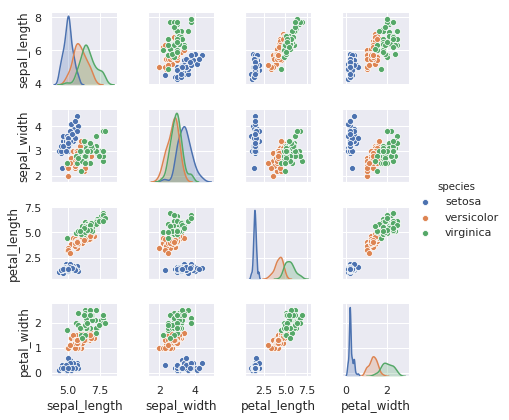

In [1]:
# %matplotlib inline faz com que as saídas dos plots sejam direcionadas para o notebook
%matplotlib inline 
import seaborn as sns; sns.set()
iris = sns.load_dataset('iris') # carrega o conjunto de dados
sns.pairplot(iris, hue='species', size=1.5);

Técnicas de regressão são utilizadas para aprender relações quantitativas entre variáveis contínuas. A figura abaixo utiliza a simulação de variáveis quantitativas utilizando a biblioteca NumPy. Novamente, a observação de uma correlação positiva entre duas variáveis indica a possibilidade de aprender sobre uma variável (*y), conhecendo outra (*x).

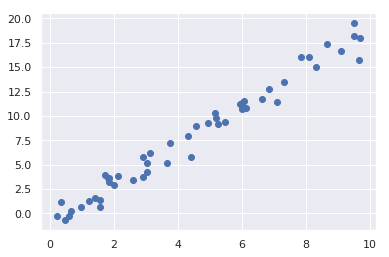

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

<a id="2"></a> <br>
# 2 - Dados em Scikit-Learn

Os algoritmos de aprendizado de máquinas disponíveis na biblioteca Scikit-Learn utilizam dados armazenados em *arrays* em duas dimensões. Os arrays podem ser do tipo NumPy, ou matrizes scipy.sparce. Os *arrays* são organizados com amostras nas linhas (*n_samples*) e características das amostras nas colunas (*n_features*). Como exemplos de amostras e características temos:

Amostra: Também descritos como itens ou objetos são as variáveis sobre as quais se quer aprender, realizando classificação ou regressão. Como exemplos amostras podem ser documentos, imagens, som, vídeo, ou qualquer objeto que possa ser descrito com características quantitativas.

Características: O número de caraterísticas ou traços distintos entre as amostras podem ser utilizados para descrever as amostras de forma quantitativa. As características são geralmente variáveis contínuas, mas podem também ser binárias ou discretas.

Vejamos como inspecionar o número de amostras e características no conjunto de dados visto acima:

In [3]:
iris.shape

(150, 5)

In [4]:
n_amostras, n_caract = iris.shape
print('Número de amostras:', n_amostras, '\nNúmero de características:', n_caract)

Número de amostras: 150 
Número de características: 5


In [5]:
# inspecionar o cabeçalho dos dados
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# contar as classes em que se dividem as amostras 
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

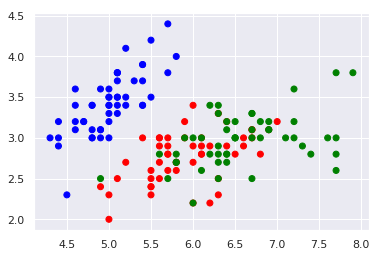

In [7]:
# plotar duas características diferenciando as amostras por cores
plt.scatter(iris['sepal_length'], iris['sepal_width'], 
            c=['blue']*50+
            ['red']*50+
            ['green']*50)

<a id="3"></a> <br>
# 3 - Conceitos da API de Scikit-Learn

Os algoritmos em Scikit-Learn são acessados através da interface ‘’Estimator’’. Por exemplo, para utilizar os algoritmos de regressão linear fazemos:

In [8]:
from sklearn.linear_model import LinearRegression

Os parâmetros de um objeto da classe "Estimator" podem ser alterados assim que um objeto da classe é criado:

In [9]:
# Criação de um objeto e modificação do parâmetro 'normalize'
modelo = LinearRegression(normalize=True)
print(modelo.normalize)

True


In [10]:
print(modelo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Para aplicar o modelo a um conjunto de dados devemos lembrar do formato dos dados de entrada vistos acima

In [11]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

X = x[:, np.newaxis] # criação de uma matriz 3 (objetos) x 1 (característica)
X

array([[0],
       [1],
       [2]])

In [12]:
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Para obter os parâmetros estimados pelo modelo (veremos mais detalhes adiante), podemos acessar os atributos terminados **_** . Lembre-se de acessar as possibilidades fazendo __model.__'TAB':

In [13]:
modelo.coef_

array([1.])

Como descrito anteriormente, a padronização da API de Scikit-Learn permite a utilização dos mesmos métodos para diferentes algoritmos, a seguir uma breve descrição de alguns médotos diponíveis:

| Onde | Nome do método | Descrição | 
|---|---|---|
|Todos estimadores|*modelo.fit()*|Para aprendizadado supervisonado utiliza dois parâmetros de entrada, dados (X) e rótulos (y). Para aprendizado não-supervisionado apenas X|
|Em estimadores para aprendizado supervisionado|*modelo.predict()*|Dado um modelo treinado e um novo conjunto de carcterísticas X_novo, prediz o rótulo da amostra|
|Alguns estimadores para aprendizado supervisionado|*modelo.predict_proba()*|Probabilidade da nova observação pertencer a cada classe (dada pelos rótulos y)|
|Em estimadores para aprendizado supervisionado|*modelo.score()*|*Scores* assumem valores entre 0 e 1, maior o *score* maior o ajuste (*fit*) do modelo| 
|Em estimadores para aprendizado não-supervisionado|*modelo.transform()*|Dado um modelo treinado e um novo conjunto de carcterísticas X_novo, executa transformações, como projeções|
|Alguns estimadores para aprendizado não-supervisionado|*modelo.fit_transform()*|Realizam *fit* e *transform* simultaneamente|

<a id="4"></a> <br>
# 4 - Ilustração da API - Análise de Regressão

Utilizaremos o conjunto de dados disponível na biblioteca Scikit-Learn com os preços de casas na cidade americana de Boston. Estes dados são constituídos de 13 características do mercado imobiliário (X) e com a mediana dos preços (y). Tentaremos responder a pergunta: É possível predizer o preço de um imóvel baseando-nos em suas características?

In [14]:
from sklearn.datasets import load_boston
dados = load_boston()
print(dados.data.shape)

print(dados.target.shape)

(506, 13)
(506,)


Como conjunto de dados presente na biblioteca para o aprendizado também podemos obter uma descrição detalhada:

In [15]:
print(dados.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Como exemplo básico de Regressão linear (tópico da próxima seção) utilizaremos a função `LinearRegression` para executar o método dos mínimos quadrados.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # funções para dividir os dados

X_treinamento, X_teste, y_treinamento, y_teste = \
train_test_split(dados.data, dados.target) # divide os dados em conjuntos de treinamento e teste
                                           # veremos mais detalhes adiante                           

In [17]:
clf = LinearRegression() # Cria um objeto do regressor
clf.fit(X_treinamento, y_treinamento) # executa o treinamento com método fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
predito = clf.predict(X_teste) # realiza a predição de um conjunto externo ao treinamento
esperado = y_teste
# raiz do valor quadrático médio (do inglês - Root Mean Square)
print("RMS: %s" % np.sqrt(np.mean((predito - esperado) ** 2))) 

RMS: 4.8341086307749395


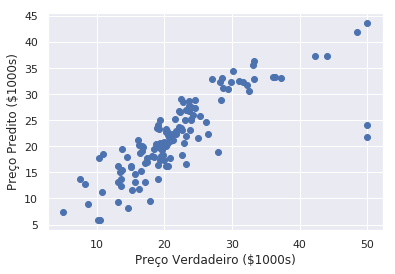

In [19]:
plt.scatter(esperado, predito)
plt.ylabel('Preço Predito ($1000s)')
plt.xlabel('Preço Verdadeiro ($1000s)')

<a id="5"></a> <br>
# 5 - Ilustração da API - Análise de Classificação

Nesta seção utilizaremos o conjunto de dados disponível na biblioteca Scikit-Learn de escrita de dígitos para ilustrar a API para classificação. Tentaremos responder a pergunta: É possível classificar a imagem de um dígito com o valor real do mesmo?

In [20]:
from sklearn.datasets import load_digits
digitos = load_digits()

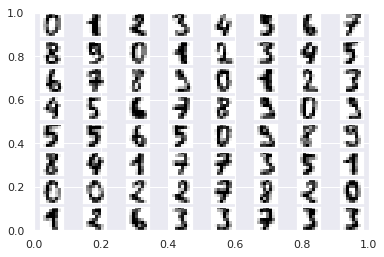

In [21]:
# Criar figuras criando sub-plot
fig, ax = plt.subplots()

# plotar os dígitos: cada um como uma imagem de 8x8 píxeis
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digitos.images[i], cmap=plt.cm.binary, interpolation='nearest')

Como exemplo básico de classicação (tópico das próximas seções) utilizaremos a função `RandomForestClassifier` para executar o método de Florestas Aleatórias (do inglês *Random Forest*) <cite data-cite="236589/HI9L49ZT"></cite>.

In [22]:
from sklearn.ensemble import RandomForestClassifier

X_treinamento, X_teste, y_treinamento, y_teste = \
train_test_split(digitos.data, digitos.target) # divide os dados em conjuntos de treinamento e teste
                                               # veremos mais detalhes adiante                           

In [23]:
clf = RandomForestClassifier()  # criar objeto com métodos para o classificador
clf.fit(X_treinamento, y_treinamento) # treinar o modelo

/home/rsilva/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
# use the model to predict the labels of the test data
predito = clf.predict(X_teste)
esperado = y_teste
print('Rótulos Preditos:', predito) 
print('Rótulos Esperados:', esperado)

Rótulos Preditos: [2 3 1 0 1 1 2 0 1 3 9 9 2 1 3 4 3 6 4 7 3 1 7 5 0 0 8 3 4 7 7 4 7 5 9 6 4
 3 4 2 9 0 2 5 6 2 4 0 8 5 0 7 1 1 9 8 5 8 6 7 8 8 4 3 9 8 1 2 4 2 0 7 1 8
 6 1 1 7 6 9 1 5 3 2 8 1 5 3 0 5 7 9 0 9 8 0 3 4 2 9 6 6 7 8 2 0 4 7 2 1 7
 0 6 2 7 2 2 4 8 9 9 0 9 4 0 0 3 8 8 6 7 8 4 3 0 1 7 5 1 3 7 9 7 3 5 6 1 5
 2 1 7 6 7 0 9 8 1 4 8 9 5 9 1 9 8 6 2 3 9 4 8 6 6 3 0 9 3 4 6 2 4 3 0 7 7
 0 8 2 5 3 1 9 7 3 6 4 6 7 8 6 1 6 8 4 2 5 6 1 1 7 0 0 0 9 4 5 0 7 3 5 8 8
 8 4 2 8 4 9 1 8 2 2 6 9 9 4 4 6 3 9 1 4 3 4 9 5 8 3 2 9 2 1 2 7 0 2 4 2 6
 1 2 9 2 6 5 3 9 3 1 0 4 2 7 0 7 3 1 9 7 7 2 8 5 5 1 1 3 9 3 9 2 0 8 2 5 0
 5 9 1 8 9 8 2 6 3 3 4 5 2 0 8 1 1 0 9 4 6 2 7 4 8 3 3 0 8 8 4 4 1 8 7 7 1
 6 1 1 5 1 3 9 6 2 8 3 4 6 9 4 5 6 6 8 0 9 7 3 4 7 6 0 2 3 9 5 7 2 1 6 0 9
 7 4 8 6 0 6 6 0 3 8 6 4 7 9 4 4 4 1 3 3 9 9 6 3 4 7 6 2 1 7 0 7 6 1 8 9 8
 4 7 6 7 0 9 4 8 6 6 2 4 0 7 0 4 6 4 0 6 2 9 2 5 4 1 4 2 2 5 0 4 3 3 8 7 0
 1 3 5 6 5 4]
Rótulos Esperados: [2 3 1 0 1 1 2 0 9 3 9 9 2 1 3 4 3 6 4 7 3 1 7 5 

<a id="6"></a> <br>
# 6 - Referências
<div class="cite2c-biblio"></div>

###### [Voltar ao topo](#top)

<!--NAVIGATION-->
< [Pandas Library](4-Pandas_Library.ipynb) | [Contents](0-Index.ipynb) | [Regression_Analysis](6-Regression_Analysis.ipynb)  >